In [2]:
# coding: utf-8
# 出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

from janome.tokenizer import Tokenizer
import janome
from collections import defaultdict

#ファイルを整形する。
# 形態素はタブ区切り、品詞等の分類はカンマ区切りなので以下の形式に整形したファイルを生成する。


with open ('neko.txt.janome-01','r',encoding='utf-8') as f:
    text = f.readlines()

lst_janome=[]
for line in text:
    lst_janome.append(
        { 'surface': line.split('\t')[0], # 表層形
          'pos'    : line.split('\t')[1].split(',')[0], # 品詞
          'pos1'   : line.split('\t')[1].split(',')[1], # 品詞細分類1
          'base'   : line.split('\t')[1].split(',')[6]   # 基本形
        })


"""
lst_janomeには以下のようなリストデータが生成される

{'surface': '一', 'pos': '名詞', 'pos1': '数', 'base': '一'}
{'surface': '吾輩', 'pos': '名詞', 'pos1': '代名詞', 'base': '吾輩'}
{'surface': 'は', 'pos': '助詞', 'pos1': '係助詞', 'base': 'は'}
{'surface': '猫', 'pos': '名詞', 'pos1': '一般', 'base': '猫'}
{'surface': 'で', 'pos': '助動詞', 'pos1': '*', 'base': 'だ'}
{'surface': 'ある', 'pos': '助動詞', 'pos1': '*', 'base': 'ある'}

"""

count_dict = defaultdict(int)


for row in lst_janome:
    count_dict[row['surface']] += 1   #該当単語のcount_dictのカウントを＋１する。
    

    """ 
    lambda関数とsortedを組み合わせてcount_dictの値でソート。
    reverse=Trueで降順指定。
    x[1]で辞書の値を指定。
    """

result = []
for k, v in sorted(count_dict.items(), key=lambda x: x[1], reverse=True):
    result.append({k:v})




In [79]:
result[0:10]

[{'の': 9194},
 {'。': 7486},
 {'て': 6865},
 {'、': 6772},
 {'は': 6420},
 {'に': 6239},
 {'を': 6067},
 {'と': 5505},
 {'が': 5336},
 {'た': 3988}]

In [74]:
lst_words = [] 
lst_count = []

for i in result[0:10]:
    key, cnt = str(i).strip('{').strip('}').replace("'","").replace(" ","").split(':')
    lst_words.append(key)
    lst_count.append(int(cnt))

In [75]:
lst_words

['の', '。', 'て', '、', 'は', 'に', 'を', 'と', 'が', 'た']

In [76]:
lst_count

[9194, 7486, 6865, 6772, 6420, 6239, 6067, 5505, 5336, 3988]

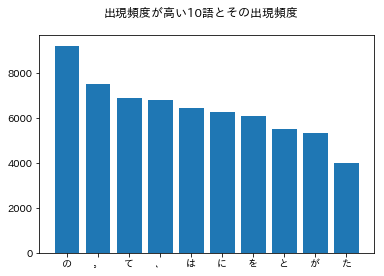

In [78]:
import matplotlib.pyplot as plt
import japanize_matplotlib

fig, ax = plt.subplots()
fig.suptitle("出現頻度が高い10語とその出現頻度")
x = lst_words
y = lst_count
ax.bar(x,y)
plt.show()


AttributeError: module 'matplotlib.pyplot' has no attribute 'set_xlabel'

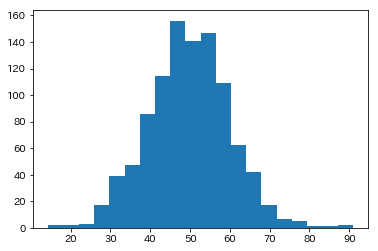

In [89]:
import numpy as np
import matplotlib.pyplot as plt
 
# 平均 50, 標準偏差 10 の正規乱数を1,000件生成
x = np.random.normal(50, 10, 1000)
plt.hist(x,bins=20)


In [90]:
# coding: utf-8
# 文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

from janome.tokenizer import Tokenizer
import janome
import collections
from collections import defaultdict

#ファイルを整形する。
# 形態素はタブ区切り、品詞等の分類はカンマ区切りなので以下の形式に整形したファイルを生成する。


with open ('neko.txt.janome-01','r',encoding='utf-8') as f:
    text = f.readlines()

lst_janome=[]
for line in text:
    lst_janome.append(
        { 'surface': line.split('\t')[0], # 表層形
          'pos'    : line.split('\t')[1].split(',')[0], # 品詞
          'pos1'   : line.split('\t')[1].split(',')[1], # 品詞細分類1
          'base'   : line.split('\t')[1].split(',')[6]   # 基本形
        })


"""
lst_janomeには以下のようなリストデータが生成される

{'surface': '一', 'pos': '名詞', 'pos1': '数', 'base': '一'}
{'surface': '吾輩', 'pos': '名詞', 'pos1': '代名詞', 'base': '吾輩'}
{'surface': 'は', 'pos': '助詞', 'pos1': '係助詞', 'base': 'は'}
{'surface': '猫', 'pos': '名詞', 'pos1': '一般', 'base': '猫'}
{'surface': 'で', 'pos': '助動詞', 'pos1': '*', 'base': 'だ'}
{'surface': 'ある', 'pos': '助動詞', 'pos1': '*', 'base': 'ある'}

"""


lst_tmp = []
for janome in lst_janome:
    lst_tmp.append(janome['surface'])  #単語リストを生成

words_frq = collections.Counter(lst_tmp).most_common()  

"""
counterの例

 Counter('abracadabra').most_common(3)  
　→　[('a', 5), ('r', 2), ('b', 2)]

最も多い n 要素を、カウントが多いものから少ないものまで順に並べたリストを返します。 
n が省略されるか None であれば、 most_common() はカウンタの すべての 要素を返します。
等しいカウントの要素は任意に並べられます:
"""

#ここからグラフ描画設定

"""
words_frqには[('の', 9194)]というようにタブルで「単語、出現回数」が格納されているので
これをもとに、{出現回数:種類の数}形式の辞書データを生成する。
"""


"\nwords_frqには[('の', 9194)]というようにタブルで「単語、出現回数」が格納されているので\nこれをもとに、{出現回数:種類の数}形式の辞書データを生成する。\n"

In [95]:
hist_freq1 = defaultdict(int)
for word, freq in words_frq:
    hist_freq1[freq] += 1


hist_freq = []
for word, freq in words_frq:
    hist_freq.append(freq)



(array([   0., 6222., 2270., 1113.,  684.,  532.,  348.,  276.,  241.,
         171.,  125.,  117.,  113.,  100.,   93.,   78.,   60.,   51.,
         109.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 19 Patch objects>)

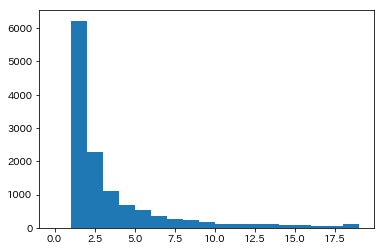

In [102]:
#グラフ描画
import matplotlib.pyplot as plt
import japanize_matplotlib

plt.hist(hist_freq,range(20))

In [105]:
hist_freq = defaultdict(int)
for word, freq in words_frq:
    hist_freq[freq] += 1

#freq1から単語鵜種類数だけを取得し、降順にする。
freq = list(hist_freq.values())
freq.sort(reverse=True)



In [109]:
freq

[6222,
 2270,
 1113,
 684,
 532,
 348,
 276,
 241,
 171,
 125,
 117,
 113,
 100,
 93,
 78,
 60,
 59,
 51,
 51,
 50,
 36,
 33,
 30,
 28,
 25,
 23,
 23,
 22,
 21,
 21,
 20,
 19,
 17,
 17,
 16,
 16,
 15,
 14,
 13,
 11,
 10,
 10,
 10,
 9,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 

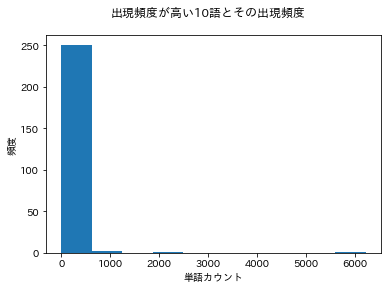

In [108]:

#グラフ描画
import matplotlib.pyplot as plt
import japanize_matplotlib

fig, ax = plt.subplots()
fig.suptitle("出現頻度が高い10語とその出現頻度")
ax.hist(freq)
ax.set_ylabel('頻度')
ax.set_xlabel('単語カウント')
plt.show()

In [ ]:

for word, cnt in result[0:10]:
  lst_words.append(word)
  lst_count.append(cnt)